In [2]:
library(Rmisc)
library(ggplot2)

## Data Preperation

### 1. Read processed data

- Data procseed in **../figs_main/fig_2.ipynb**

In [3]:
df.pairing.prob.diff=readRDS("../data/fig_2-3_pairing.prob.diff.RDS")

### 2. Compute the mean (and CI) of the normed probabilities

In [4]:
summary.pairing.prob.diff=summarySE(df.pairing.prob.diff, measurevar="prob.diff",
                                    groupvars=c("h.ethnicity", "g.ethnicity", "sre"))

In [5]:
summary.pairing.prob.diff$ci=summary.pairing.prob.diff$sd*1.96

In [6]:
summary.pairing.prob.diff$h.ethnicity=ifelse(summary.pairing.prob.diff$h.ethnicity=="RA",
                                             "Racially Unidentified", summary.pairing.prob.diff$h.ethnicity)

In [7]:
re_from="\\b([[:alpha:]])([[:alpha:]]+)"
summary.pairing.prob.diff$h.ethnicity=gsub(re_from, "\\U\\1\\L\\2", summary.pairing.prob.diff$h.ethnicity, perl=TRUE)

In [8]:
summary.pairing.prob.diff$h.ethnicity=factor(summary.pairing.prob.diff$h.ethnicity,
                                             levels=c("Racially Unidentified","White","Asian","Black"),
                                             ordered=TRUE)

In [9]:
summary.pairing.prob.diff$g.ethnicity=factor(summary.pairing.prob.diff$g.ethnicity,
                                             levels=c("WHITE","ASIAN","BLACK"),
                                             ordered=TRUE)

In [10]:
summary.pairing.prob.diff$sre=factor(summary.pairing.prob.diff$sre)

### 3. Plot the results

In [11]:
l_guest.race.label=c(
    "BLACK"="Black Guest",
    "WHITE"="White Guest",
    "ASIAN"="Asian Guest")
cc=c("#899da4","#2c2d4a","#be5d05","#f1aa00")

dodge=position_dodge(width=0.5)
pdf("../output/supp_fig_s1.pdf", width=7.5, height=8.5)
g = ggplot(summary.pairing.prob.diff, aes(x=sre, y=prob.diff)) + 
  geom_line(position=dodge, size=1, aes(color=h.ethnicity, group=h.ethnicity)) +
  xlab("Number of Same-Race Endorsements\n(Out of 5 or More Front-Page Reviews)") + 
  ylab("Pairing Probability Compared to Random") +
  geom_point(position=dodge, aes(color=h.ethnicity, group=h.ethnicity), size=2.5) +
  geom_errorbar(aes(ymin=prob.diff-ci, ymax=prob.diff+ci, color=h.ethnicity),
                size=0.9, width=0.15, position=dodge) +
  scale_color_manual(values=cc) +
  scale_x_discrete(labels=c("0","1","2","3","4","5+")) +
  facet_grid(g.ethnicity~., margins=FALSE, switch="y", scales="free_y",
             labeller=as_labeller(l_guest.race.label)) + labs(color="Host Race") +
             theme_classic() + theme(panel.border=element_rect(fill=NA, size=0.3)) +
  coord_cartesian(ylim=c(-0.3,0.4)) +
  geom_hline(yintercept=0, linetype="dashed", color="#D55E00") +
  theme(legend.position="top",
        legend.justification='left',
        panel.grid.major=element_blank(),
        text=element_text(size=15))
plot(g)
dev.off()

pdf 
  2

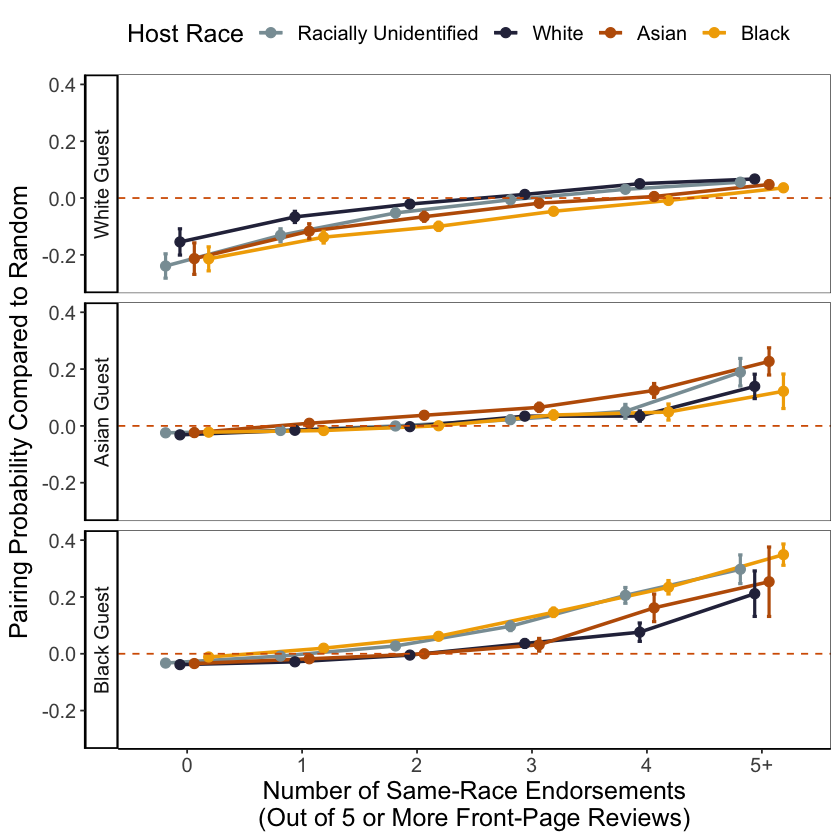

In [12]:
g